# **CHURN IDENTIFY MODEL**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('churn.csv')

## **Pre-Processing**


### Task 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

customerID int64 <- str
age float <- str
CurrentWorkingStatus
HasCrCard
IsActiveMember
EstimatedSalary  


row and customer might be the same
gender and sex


Tenure should be float or integer
num of product float or integer

In [9]:
#df = df[df.isnull().mean(axis=1)<0.8]

In [10]:
#df.info()

# **1. Convert int to string and float to integer**

In [12]:
df['RowNumber'] = df['RowNumber'].astype(str)

In [13]:
df['CustomerId'] = df['CustomerId'].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  object 
 1   CustomerId            10000 non-null  object 
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

# **2. Missing values**

# CreditScore

In [17]:
df['CreditScore'].unique()

array([619., 608., 502., 699., 850., 645., 822., 376., 501., 684., 528.,
       497., 476., 549., 635., 616., 653., 587., 726., 732., 636.,  nan,
       722., 475., 490., 804., 582., 472., 465., 556., 834., 660., 776.,
       829., 637., 550., 698., 585., 788., 655., 601., 656., 725., 511.,
       614., 742., 687., 555., 603., 751., 581., 735., 661., 675., 738.,
       813., 657., 604., 519., 664., 678., 757., 416., 665., 777., 543.,
       506., 493., 652., 750., 729., 646., 647., 808., 524., 769., 730.,
       515., 773., 814., 710., 413., 623., 670., 622., 785., 605., 479.,
       685., 538., 562., 721., 628., 668., 828., 674., 625., 432., 770.,
       758., 795., 686., 789., 589., 461., 584., 579., 756., 663., 682.,
       793., 691., 485., 650., 754., 535., 716., 539., 706., 586., 631.,
       717., 800., 683., 704., 615., 667., 484., 480., 578., 512., 510.,
       606., 597., 778., 514., 525., 715., 580., 807., 521., 759., 516.,
       711., 618., 643., 671., 689., 620., 676., 57

In [18]:
df['CreditScore'].describe()

count    9963.000000
mean      650.624812
std        96.606044
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

In [19]:
df['CreditScore'].value_counts()

CreditScore
850.0    233
678.0     63
655.0     54
705.0     53
667.0     53
        ... 
423.0      1
404.0      1
351.0      1
365.0      1
419.0      1
Name: count, Length: 460, dtype: int64

In [20]:
df['CreditScore'].value_counts(bins=10)

(650.0, 700.0]      1942
(600.0, 650.0]      1866
(700.0, 750.0]      1516
(550.0, 600.0]      1437
(500.0, 550.0]       971
(750.0, 800.0]       948
(800.0, 850.0]       643
(450.0, 500.0]       452
(400.0, 450.0]       169
(349.499, 400.0]      19
Name: count, dtype: int64

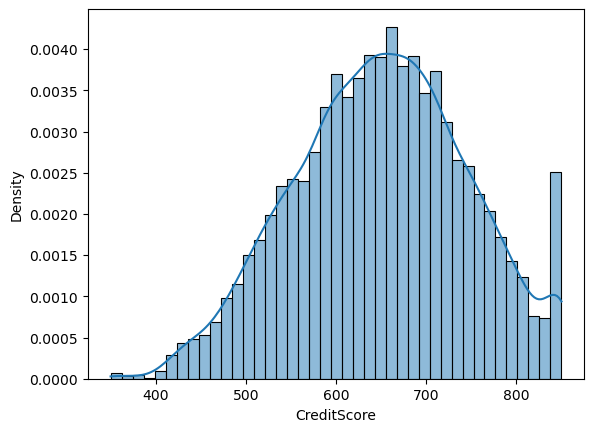

In [21]:
sns.histplot(df['CreditScore'], kde=True, stat='density')
plt.show()

In [22]:
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())

# geography

In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany', 'DE', nan, 'ES', 'FR'], dtype=object)

In [25]:
df['Geography'] = df['Geography'].replace({
    'FR': 'France',
    'ES': 'Spain',
    'DE': 'Germany'
})

In [26]:
df['Geography'].value_counts()

Geography
France     4998
Germany    2495
Spain      2470
Name: count, dtype: int64

In [27]:
df['Geography'].describe()

count       9963
unique         3
top       France
freq        4998
Name: Geography, dtype: object

In [28]:
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

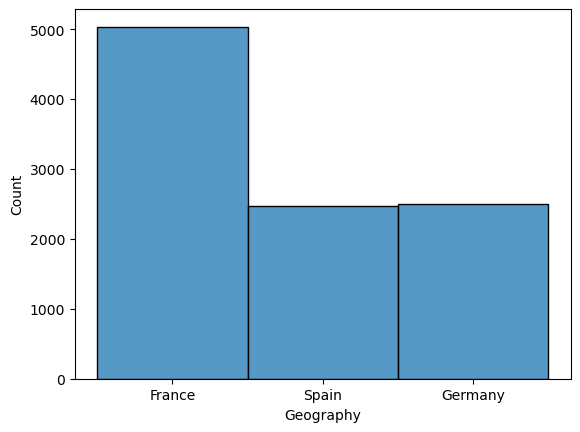

In [29]:
sns.histplot(df['Geography'], kde=False, stat='count')
plt.show()

In [30]:
print("*** Before one-hot encoding ***")
print(df['Geography'].head(5))
print("*** Before one-hot encoding ***")
print(pd.get_dummies(df['Geography']).head(5)) 

*** Before one-hot encoding ***
0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object
*** Before one-hot encoding ***
   France  Germany  Spain
0    True    False  False
1   False    False   True
2    True    False  False
3    True    False  False
4   False    False   True


In [31]:
df = pd.get_dummies(df, columns=['Geography'])

# Gender

In [33]:
df['Gender'].unique() #Is teh same as Sex so Sex would be ereased so we can choose Female as 0 and Male as 1

array(['Female', 'Male', nan], dtype=object)

In [34]:
df['Gender'].value_counts()

Gender
Male      5439
Female    4524
Name: count, dtype: int64

In [35]:
df['Gender'].describe() 

count     9963
unique       2
top       Male
freq      5439
Name: Gender, dtype: object

In [36]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

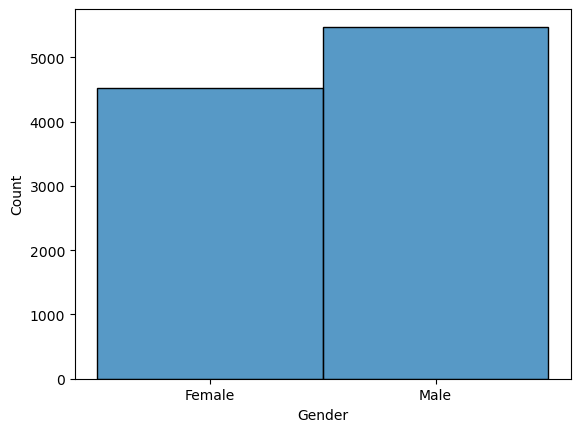

In [37]:
sns.histplot(df['Gender'], kde=False, stat='count')
plt.show()

In [38]:
print("*** Before one-hot encoding ***")
print(df['Gender'].head(5))
print("*** Before one-hot encoding ***")
print(pd.get_dummies(df['Gender']).head(5)) 

*** Before one-hot encoding ***
0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object
*** Before one-hot encoding ***
   Female   Male
0    True  False
1    True  False
2    True  False
3    True  False
4    True  False


In [39]:
df = pd.get_dummies(df, columns=['Gender'])


# Age

In [41]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
9963 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [42]:
df['Age'].unique()

array([42., 41., 39., 43., 44., -1., 29., 27., 31., 24., 34., 25., 45.,
       58., 32., nan, 33., 36., 40., 51., 61., 49., 38., 37., 19., 66.,
       35., 56., 26., 21., 55., 46., 75., 22., 30., 28., 65., 48., 52.,
       50., 57., 73., 47., 54., 72., 20., 67., 79., 62., 53., 80., 59.,
       68., 23., 60., 70., 63., 64., 18., 82., 69., 74., 71., 76., 77.,
       88., 85., 84., 78., 81., 92., 83.])

In [43]:
df['Age'].describe()

count    9963.000000
mean       38.898223
std        10.541477
min        -1.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [44]:
df['Age'].value_counts()

Age
37.0    477
38.0    474
35.0    470
36.0    453
34.0    445
       ... 
92.0      2
82.0      1
88.0      1
85.0      1
83.0      1
Name: count, Length: 71, dtype: int64

In [45]:
df['Age'].value_counts(bins=10)

(26.9, 36.2]                  3781
(36.2, 45.5]                  3263
(45.5, 54.8]                  1224
(17.6, 26.9]                   809
(54.8, 64.1]                   598
(64.1, 73.4]                   210
(73.4, 82.7]                    65
(82.7, 92.0]                     7
(-1.0939999999999999, 8.3]       6
(8.3, 17.6]                      0
Name: count, dtype: int64

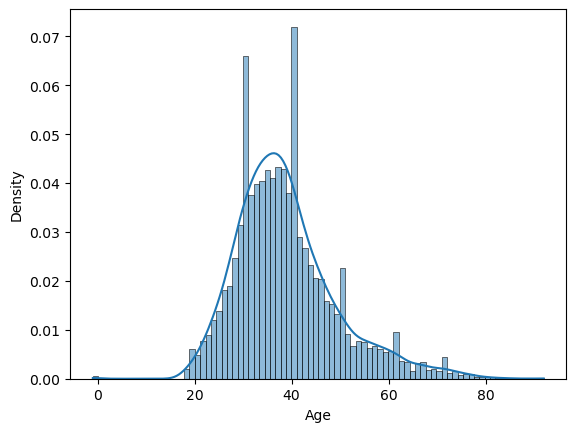

In [46]:
sns.histplot(df['Age'], kde=True, stat='density')
plt.show()

In [47]:
mask = df['Age']<1
df.loc[mask, 'Age'] = np.nan # remove ages of -1 

In [48]:
df['Age'].describe()

count    9957.000000
mean       38.922266
std        10.499038
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [49]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #median becasue it has outliers so mean would not work properly

# CurrentWorkingStatus

In [51]:
df['CurrentWorkingStatus'].unique()

array([ 1., nan,  0.])

In [52]:
df['CurrentWorkingStatus'].value_counts()

CurrentWorkingStatus
1.0    9929
0.0      34
Name: count, dtype: int64

In [53]:
df['CurrentWorkingStatus'] = df['CurrentWorkingStatus'].fillna(df['CurrentWorkingStatus'].mode()[0])

# Tenure

In [55]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9., nan,  0.])

In [56]:
df['Tenure'].describe()

count    9963.000000
mean        5.014453
std         2.891880
min         0.000000
25%         3.000000
50%         5.000000
75%         7.500000
max        10.000000
Name: Tenure, dtype: float64

In [57]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mode()[0])
df['Tenure'] = df['Tenure'].astype(int)

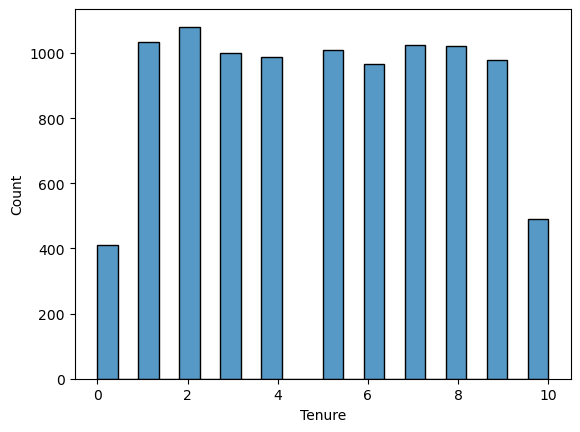

In [58]:
sns.histplot(df['Tenure'], kde=False, stat='count')
plt.show()

# Balance

In [60]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [61]:
df['Balance'].describe()

count      9963.000000
mean      76501.435194
std       62411.069692
min           0.000000
25%           0.000000
50%       97234.580000
75%      127657.840000
max      250898.090000
Name: Balance, dtype: float64

In [62]:
df['Balance'].value_counts() # too many 0 are outliers but not noisy

Balance
0.00         3604
130170.82       2
105473.74       2
159397.75       1
154377.30       1
             ... 
121164.11       1
64667.95        1
71553.83        1
133793.89       1
130142.79       1
Name: count, Length: 6358, dtype: int64

In [63]:
df['Balance'].value_counts(bins=10)

(-250.899, 25089.809]       3610
(100359.236, 125449.045]    2073
(125449.045, 150538.854]    1743
(75269.427, 100359.236]     1166
(150538.854, 175628.663]     726
(50179.618, 75269.427]       358
(175628.663, 200718.472]     186
(25089.809, 50179.618]        69
(200718.472, 225808.281]      30
(225808.281, 250898.09]        2
Name: count, dtype: int64

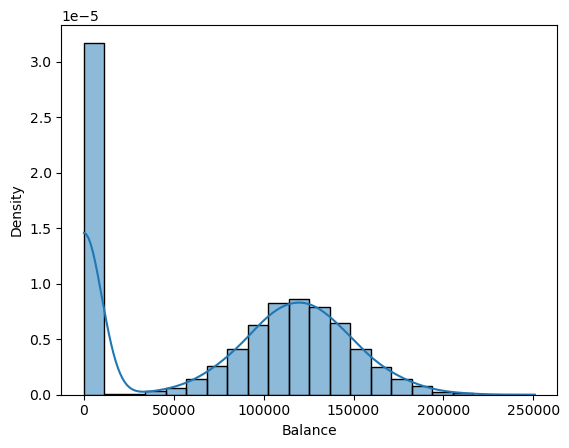

In [64]:
sns.histplot(df['Balance'], kde=True, stat='density')
plt.show()

In [65]:
df['Balance'] = df['Balance'].fillna(df['Balance'].median()) 

# NumOfProducts

In [67]:
df['NumOfProducts'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [68]:
df['NumOfProducts'].describe()

count    9859.000000
mean        1.531088
std         0.582007
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64

In [69]:
df['NumOfProducts'].value_counts()

NumOfProducts
1.0    5005
2.0    4532
3.0     262
4.0      60
Name: count, dtype: int64

In [70]:
df['NumOfProducts'] = df['NumOfProducts'].fillna(df['NumOfProducts'].mode()[0]) 

# ComplaintsLodged

In [72]:
df['ComplaintsLodged'].unique()

array([ 1.,  0., nan])

In [73]:
df['ComplaintsLodged'].value_counts()

ComplaintsLodged
0.0    7899
1.0    2064
Name: count, dtype: int64

In [74]:
df['ComplaintsLodged'] = df['ComplaintsLodged'].fillna(df['ComplaintsLodged'].mode()[0])

# HasCrCard

In [76]:
df['HasCrCard'].unique()

array([ 1.,  0., nan])

In [77]:
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])

# IsActiveMember

In [79]:
df['IsActiveMember'].unique()

array([ 1.,  0., nan])

In [80]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5131
0.0    4832
Name: count, dtype: int64

In [81]:
df['IsActiveMember'].describe()

count    9963.000000
mean        0.515006
std         0.499800
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsActiveMember, dtype: float64

In [82]:
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

# EstimatedSalary

In [84]:
df['EstimatedSalary'].unique()

array(['101348.88', '112542.58', '113931.57', ..., '42085.58', '92888.52',
       '38190.78'], dtype=object)

In [85]:
df['EstimatedSalary'].head()

0    101348.88
1    112542.58
2    113931.57
3            ?
4      79084.1
Name: EstimatedSalary, dtype: object

In [86]:
df['EstimatedSalary'] = df['EstimatedSalary'].replace('?', np.nan)

In [87]:
df['EstimatedSalary'].describe()

count         9832
unique        9831
top       24924.92
freq             2
Name: EstimatedSalary, dtype: object

In [88]:
df['EstimatedSalary'].head()

0    101348.88
1    112542.58
2    113931.57
3          NaN
4      79084.1
Name: EstimatedSalary, dtype: object

In [89]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)

In [90]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].median())

I did it with mod at first because it was categorical at first, now they are numerical so we have to choose, mean or median

# Exited

In [93]:
df['Exited'].unique()

array(['Yes', 'No'], dtype=object)

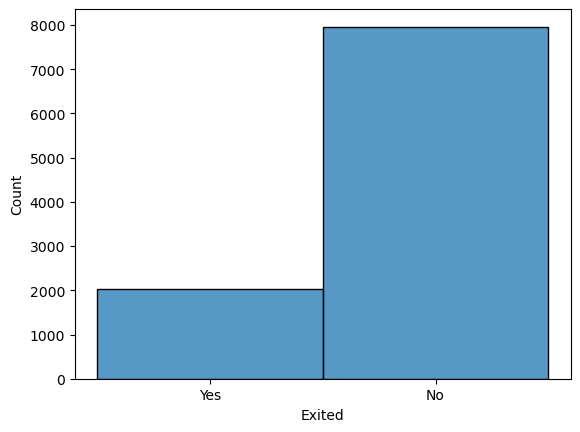

In [94]:
sns.histplot(df['Exited'], kde=False, stat='count')
plt.show()

In [95]:
df['Exited'] = [1 if x =='Yes' else 0 for x in df['Exited']]

In [96]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  float64
 1   Age                   10000 non-null  float64
 2   CurrentWorkingStatus  10000 non-null  float64
 3   Tenure                10000 non-null  int32  
 4   Balance               10000 non-null  float64
 5   NumOfProducts         10000 non-null  float64
 6   ComplaintsLodged      10000 non-null  float64
 7   HasCrCard             10000 non-null  float64
 8   IsActiveMember        10000 non-null  float64
 9   EstimatedSalary       10000 non-null  float64
 10  Exited                10000 non-null  int64  
 11  Geography_France      10000 non-null  bool   
 12  Geography_Germany     10000 non-null  bool   
 13  Geography_Spain       10000 non-null  bool   
 14  Gender_Female         10000 non-null  bool   
 15  Gender_Male         

# **2. Dropping Unnecesary Variables**

In [98]:
# Select only columns with numerical values.
numerical_columns = df.select_dtypes(include=['number'])
# Display the correlation matrix.
correlation_matrix = numerical_columns.corr()
correlation_matrix

,CreditScore,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.003430,-0.004636,4.016135e-03,0.001104,6.449114e-03,0.012154,-0.028552,-0.005653,0.025468,-0.001475,-0.026588
Sex,0.003430,1.000000,0.028610,3.467706e-03,-0.014867,-1.204127e-02,0.020297,0.090425,-0.006899,-0.021314,0.005056,0.106792
Age,-0.004636,0.028610,1.000000,-1.228564e-02,-0.009004,2.763506e-02,-0.027682,0.258047,-0.011998,0.084568,-0.005912,0.284804
CurrentWorkingStatus,0.004016,0.003468,-0.012286,1.000000e+00,0.019668,-4.580839e-07,-0.003540,0.000075,-0.018773,-0.001474,-0.001137,-0.000316
Tenure,0.001104,-0.014867,-0.009004,1.966814e-02,1.000000,-1.289843e-02,0.014439,-0.013482,0.020707,-0.030379,0.007251,-0.013111
Balance,0.006449,-0.012041,0.027635,-4.580839e-07,-0.012898,1.000000e+00,-0.302218,0.114804,-0.014701,-0.009231,0.013436,0.118488
NumOfProducts,0.012154,0.020297,-0.027682,-3.539602e-03,0.014439,-3.022176e-01,1.000000,-0.043662,0.002359,0.008275,0.013450,-0.046807
ComplaintsLodged,-0.028552,0.090425,0.258047,7.470628e-05,-0.013482,1.148040e-01,-0.043662,1.000000,-0.008369,-0.145701,0.013974,0.905249
HasCrCard,-0.005653,-0.006899,-0.011998,-1.877278e-02,0.020707,-1.470088e-02,0.002359,-0.008369,1.000000,-0.009981,-0.009122,-0.007822
IsActiveMember,0.025468,-0.021314,0.084568,-1.474111e-03,-0.030379,-9.230534e-03,0.008275,-0.145701,-0.009981,1.000000,-0.011202,-0.155878


In [99]:
# Create a mask for the upper triangle to avoid duplicate data
correlation_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

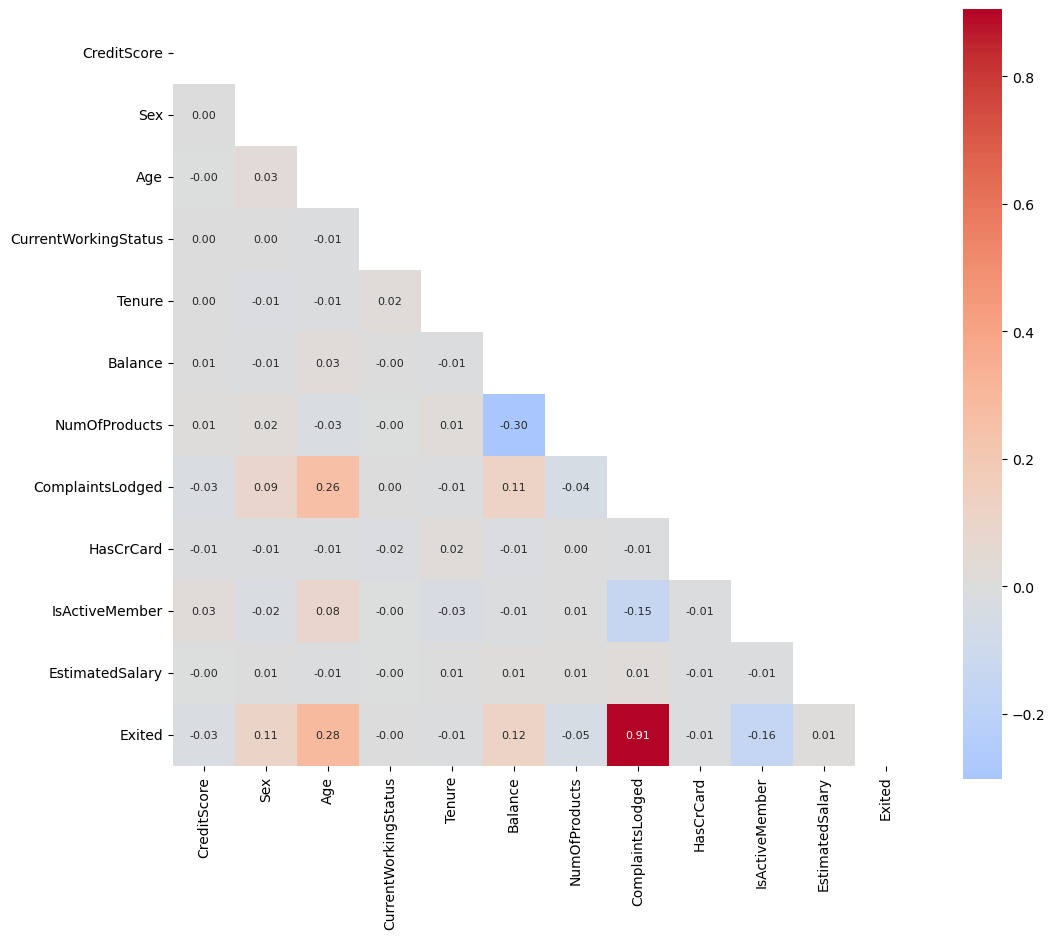

In [100]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
annot_kws={'size': 8}, cmap='coolwarm',
center=0, mask=correlation_mask, square=True)
plt.show()

There is not notisable correlation between variables

In [102]:
df.drop(['Sex', 'Surname', 'RowNumber', 'CustomerId'], axis = 1, inplace = True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  float64
 1   Age                   10000 non-null  float64
 2   CurrentWorkingStatus  10000 non-null  float64
 3   Tenure                10000 non-null  int32  
 4   Balance               10000 non-null  float64
 5   NumOfProducts         10000 non-null  float64
 6   ComplaintsLodged      10000 non-null  float64
 7   HasCrCard             10000 non-null  float64
 8   IsActiveMember        10000 non-null  float64
 9   EstimatedSalary       10000 non-null  float64
 10  Exited                10000 non-null  int64  
 11  Geography_France      10000 non-null  bool   
 12  Geography_Germany     10000 non-null  bool   
 13  Geography_Spain       10000 non-null  bool   
 14  Gender_Female         10000 non-null  bool   
 15  Gender_Male         

Questions:
1. The dataset may include irrelevant and redundant variables to the underlying ML task.
What variables did you include in the modelling, and what were their roles and measurement level set? Justify your choice.
The variables included in the modelling are:

- **CreditScore:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Credit Score is a numerical, ------------------------------
  Justification: 
  
- **Age:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Age is a numerical, discrete variable
  Justification: It can reflect a possible behabioral tendency according to different ages.

  
- **Tenure:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Ternure is a numerical, discrete variable
  Justification: The ternure of a cleinte can influence their loyalty towars the bank.

  
- **Balance:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Balance is a numerical, continuous variable
  Justification:

  
- **NumOfProducts:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Number of products is a numerical, discrete variable
  Justification: The number of products can be reflected in the loyalty of the client.  

  
- **EstimatedSalary:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Estimated Salary is a numerical, continuous.
  Justification:

  
- **Exited:**
  Role: Label Variable/Target variable
  Measurement Level: Exited is a Categorical, Binary variable (Yes/No)
  Justification: 

  
- **Gender_Female:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Gender_Female is a Categorical, Binary variable (0/1)
  Justification: It can reflect a geographical tendency.

  
- **Gender_Male:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Gender_Male is a Categorical, Binary variable (0/1)
  Justification: It may reflect different behabiours patrons.

  
- **Geography_France:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Geography_France is a Categorical, Binary variable (0/1)
  Justification: It can reflect a geographical tendency.

  
- **Geography_Germany:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Geography_Germany is a Categorical, Binary variable (0/1)
  Justification: It can reflect a geographical tendency.

  
- **Geography_Spain**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Geography_Spain is a Categorical, Binary variable (0/1)
  Justification: It can reflect a geographical tendency.

  
- **CurrentWorkingStatus_0.0**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
- **CurrentWorkingStatus_1.0**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
- **ComplaintsLodged_0.0**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
- **ComplaintsLodged_1.0**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
- **HasCrCard_0.0:**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
- **HasCrCard_1.0'**
  Role: Prediction variable/Imput variable. This is an independent variable 
  Measurement Level: Current Working Status is a Categorical, Binary variable (0/1)
  Justification:

  
3. Did you have to fix any data quality problems, including data imputation? Detail them.
The numerical attributes of CreditScore, Age, Balance, NumOfProducts, tenure, and EstimatedSalary have fewer values than the whole data, so I have to impute them. We used the median to impute those values because CreditScore, Age, Balance, and the number of products have skewed data. Before the imputation, CreditScore had a normal bell shape, so fill the missing data with the mean. Age had a right-skewed data so we imputed it with the median. Balance was imputed with the mean because it has a symmetric distribution. NumberOfProducts was right-skewed so it was imputed with the median. Ternure and Estimated Salary were both in a string type so we had to use the mode to fill the missing values and then convert them to integer in the case of Ternure and float in the case of Estimated Salary. Estimated salary also had another problem and it was that it has the '?' symbol in some values, so we replaced that symbol with nan, and then we 


4. Report the proportion of values of the target variable for the dataset before and after the pre-processing


### Task 2

### DECISION TREE
4/04/2025 We are going to choose the decision tree because we want to answe to this question: Is this person likely to churn (Exit and stops using the bank's services) or not? this question has a categorical response which is Yes or Not
- For that reason we are going to discretizar the non categorical values, with the bining method to pass from cotinues values to categorical ones

In [107]:
df

,CreditScore,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,1.0,2,0.00,1.0,1.0,1.0,1.0,101348.880,1,True,False,False,True,False
1,608.0,41.0,1.0,1,83807.86,1.0,0.0,0.0,1.0,112542.580,0,False,False,True,True,False
2,502.0,42.0,1.0,8,159660.80,3.0,1.0,1.0,0.0,113931.570,1,True,False,False,True,False
3,699.0,39.0,1.0,1,0.00,2.0,0.0,0.0,0.0,100438.025,0,True,False,False,True,False
4,850.0,43.0,1.0,2,125510.82,1.0,0.0,1.0,1.0,79084.100,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,1.0,5,0.00,2.0,0.0,1.0,0.0,96270.640,0,True,False,False,False,True
9996,516.0,35.0,1.0,10,57369.61,1.0,0.0,1.0,1.0,101699.770,0,True,False,False,False,True
9997,709.0,36.0,1.0,7,0.00,1.0,1.0,0.0,1.0,42085.580,1,True,False,False,True,False
9998,772.0,42.0,1.0,3,75075.31,2.0,1.0,1.0,0.0,92888.520,1,False,True,False,False,True


Obtaining Features:
**We choose the Target Value to be Exited as we want to predict if the customers are likely to churn, or likely to end services with the bank**

In [109]:
y = df['Exited'].values
X = df.drop(['Exited'], axis = 1)
feature_names = X.columns
X = X.values

In [110]:
feature_names

Index(['CreditScore', 'Age', 'CurrentWorkingStatus', 'Tenure', 'Balance',
       'NumOfProducts', 'ComplaintsLodged', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [111]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [112]:
X

array([[619.0, 42.0, 1.0, ..., False, True, False],
       [608.0, 41.0, 1.0, ..., True, True, False],
       [502.0, 42.0, 1.0, ..., False, True, False],
       ...,
       [709.0, 36.0, 1.0, ..., False, True, False],
       [772.0, 42.0, 1.0, ..., False, False, True],
       [792.0, 28.0, 1.0, ..., False, True, False]], dtype=object)

### Choosing the size of training data and test data

In [114]:
from sklearn.model_selection import train_test_split
random_state = 10
test_set_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_set_size, stratify=y, random_state=random_state)

print('Size of training set: ', len(X_train))
print('Size of test set: ', len(X_test))

Size of training set:  7000
Size of test set:  3000


randon state as 10 becasue we want that when we run the tree it has alwasy the same result
test data is going to be 30% of the data that we have

# Decision tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=random_state)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

#### Model Parameters

In [119]:
print('***********Model Parameters*************\n', model.get_params(deep=True))
print('Number of leaves in the trained model:', model.get_n_leaves())

***********Model Parameters*************
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 10, 'splitter': 'best'}
Number of leaves in the trained model: 312


- Criterion:
- Max depth:
- Min samples leaf:

#### Evaluating the decision tree model

1. Accuracy

In [123]:
print('Training set accuracy: ', model.score(X_train, y_train))

Training set accuracy:  0.9994285714285714


An accuracy of 0.999% means that the model can predict almost every model but it may mean the model is ovberfitting so we have to look at the test set to see the accuracy of it

In [125]:
print('Test set accuracy: ', model.score(X_test, y_test))

Test set accuracy:  0.9483333333333334


The difference between the training data and the test data (0.05075) which is 5% reflects a overfiting

2. Precision/ Recall /F1

In [128]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2389
           1       0.88      0.87      0.87       611

    accuracy                           0.95      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.95      0.95      0.95      3000



The model has a un-balance on the labels, from 3000 data of the test set, only 611 stop using the bank services and 2389 did not stop using the bank services

1. Precision: there is a 96% of precision in the prediction of the people who continue taking the bank services, and 90% of precision in the prediction of people who exite the bank 
2. Recall: from the model we can observe that 85% of the people which churn were identify correctly and 97% of people which continue taking the services were identify correctly
3. F1: there is a 

#### Visualizaing the tree model

Feature importance by descending order

In [133]:
def display_feature_importances(model, feature_names, features_to_display=20):
    importances = model.feature_importances_
    
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    
    indices = indices[:features_to_display]
    for i in indices:
        print(feature_names[i], ':', importances[i])
    print('Number of leaves: ', model.get_n_leaves())

display_feature_importances(model, feature_names)

ComplaintsLodged : 0.8102849835384187
EstimatedSalary : 0.036552489760974104
Balance : 0.03511695517872069
Age : 0.03239125706865296
CreditScore : 0.03119321325813192
Tenure : 0.01745022387536266
NumOfProducts : 0.01359038787350644
IsActiveMember : 0.005202171883284717
Geography_Germany : 0.005012654829721901
Gender_Female : 0.004976412833920862
HasCrCard : 0.0032454933969193796
Geography_France : 0.002259901435359088
Gender_Male : 0.0017868183526242578
Geography_Spain : 0.0009370367144022268
CurrentWorkingStatus : 0.0
Number of leaves:  312


The most important feature for this model are: 
1. ComplaintsLodged
2. EstimatedSalary
3. Balance

In [135]:
#!pip install pydot
#!pip install graphviz

In [136]:
from IPython.display import Image, display
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

def visualize_model(model):
    dotfile = StringIO()
    export_graphviz(model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    display(Image(graph[0].create_png()))
    
visualize_model(model)

The model is very deep and uncomprehensivel which is a caracteristic of overfitting trees. For that reason we are going to set a maximum depth or upper limit (Pre-Pruning) 

#### Pre-pruning

#### 1. Re-training the model with a limith on the branches specifiying the max_depth value

In [140]:
model_small = DecisionTreeClassifier(max_depth=3, random_state=random_state)
model_small.fit(X_train, y_train)

y_pred = model_small.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



1. Accuracy of 97% -> In the data test the model correctly predicted 97% of the cases.
2. Precision ->
   - When the model predict No, its prediction is correctly 98% of the times.
   - When the model predict Yes, its prediction is correctly 93% of the times.
4. Recall ->
   - The model correctly predited 98% of the No.
   - The model correctly predicted 94% of the Yes.
5. F1 ??????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????


#### Feature Importance for the small model

ComplaintsLodged : 0.9853184396317967
Age : 0.01069957314567222
NumOfProducts : 0.003981987222530941
Gender_Male : 0.0
Gender_Female : 0.0
Geography_Spain : 0.0
Geography_Germany : 0.0
Geography_France : 0.0
EstimatedSalary : 0.0
IsActiveMember : 0.0
HasCrCard : 0.0
Balance : 0.0
Tenure : 0.0
CurrentWorkingStatus : 0.0
CreditScore : 0.0
Number of leaves:  7


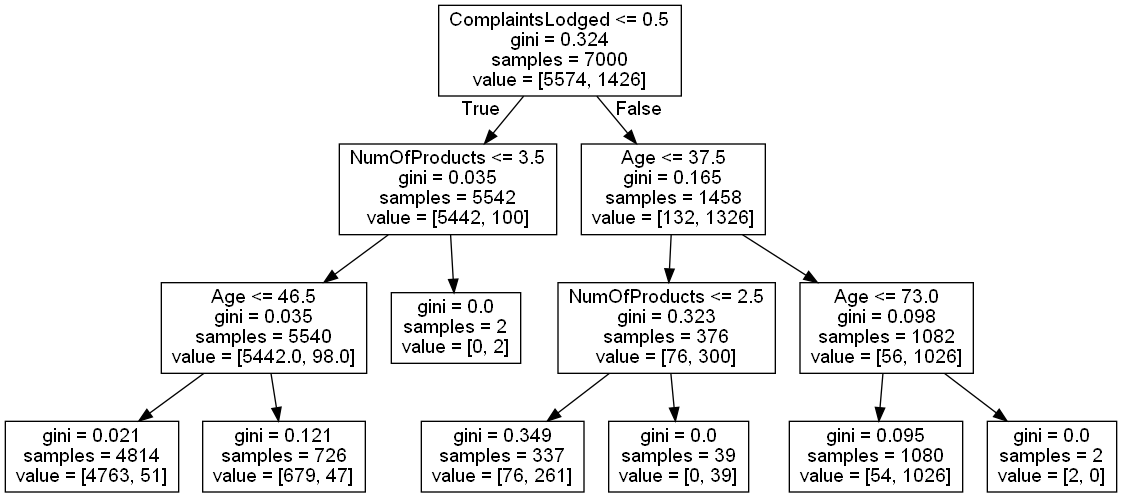

In [143]:
display_feature_importances(model_small, feature_names)
visualize_model(model_small)

For this small model, the most important features are ComplaintsLodged, NumOfProducts and Age

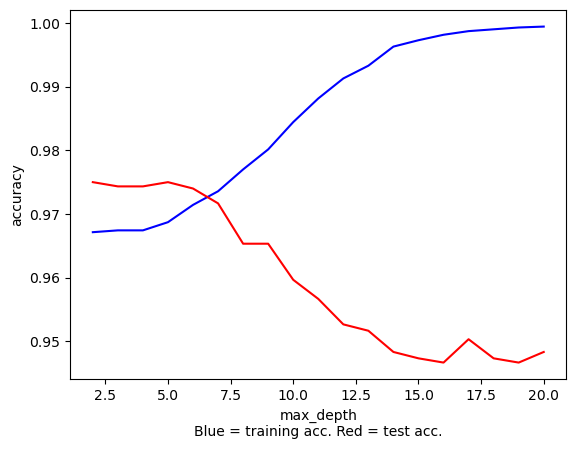

In [145]:
import matplotlib.pyplot as plt
test_score = []
train_score = []
for max_depth in range(2,21):
    temp_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    temp_model.fit(X_train, y_train)
    test_score.append(temp_model.score(X_test, y_test))
    train_score.append(temp_model.score(X_train, y_train))

#plot
plt.plot(range(2,21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

According to the graph:
- Between 1 to 6, the model is basic and can generalice. Between 4 to 6 the test set starts increasing its accuracy. (Best model has a depth between 4 and 6 because it has a good accuracy for training and test and it is not averfiting)
- Between 7 to 10 the model starts to overfit
- After 10 leafs the model starts to overfit too much


It is necesary to analyce the data with other hyperparameters

#### 2. GridSearchCV for Criterion, Maximum Depth and Minimum Samples Leaf

In [148]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,6),
    'min_samples_leaf': range(20,60,10)
}

def perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10):
    cv = GridSearchCV(param_grid=params,
estimator=DecisionTreeClassifier(random_state=random_state), cv=num_folds, verbose=1,
n_jobs=-1)
    cv.fit(X_train, y_train)
    
# Display the accuracy of the best fit model.
    print("Train accuracy:", cv.score(X_train, y_train))
    print("Test accuracy:", cv.score(X_test, y_test))


# Evaluate the best fit model.
    y_pred = cv.predict(X_test)
    print(classification_report(y_pred, y_test))
    
# Display parameters of the best model.
    print(cv.best_params_)
    return cv
    
perform_grid_search(X_train, y_train, X_test, y_test, params)



Fitting 10 folds for each of 40 candidates, totalling 400 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20}


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(20, 60, 10)},
             verbose=1)

In [149]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,6),
    'min_samples_leaf': range(1,20)
}

cv = perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10)

Fitting 10 folds for each of 190 candidates, totalling 1900 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}


C:\Users\scarl\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [150]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5],
    'min_samples_leaf': [1,2,4,10,20,30,40]
}

cv_1 = perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}


In [151]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8,10],
    'min_samples_leaf': [1,2,4,10,20,30,40]
}

cv_2 = perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10)

Fitting 10 folds for each of 98 candidates, totalling 980 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}


In [152]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,20],
    'min_samples_leaf': range(10,100,10)
}

cv_2 = perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}


From all the test it is notisable that the detph of the tree do not increase the accuracy, it is not benefitial, the minimum amount of samples a tree the leaf have to accept if 4 to get a better generalization and precision. So the choosed model is going to be cv.

#### Visualize the cv tree

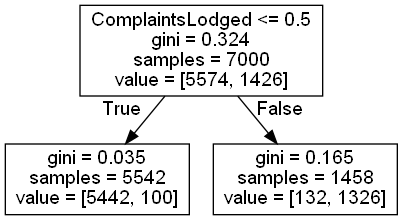

In [155]:
model_cv = cv.best_estimator_
visualize_model(model_cv)

#### Area under the curve

In [157]:
y_pred = model_cv.predict(X_test)
y_pred_proba_dt = model_cv.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on Exited (Yes, No).")
print("You should be able to see the default threshold of 0.5.")
print("(Probs on Zero) (Probs on One) (Predicted) (Actual)")

# print top 10
for i in range(20):
    print(f"{y_pred_proba_dt[i][0]:.13f} {y_pred_proba_dt[i][1]:.13f} {y_pred[i]:<10} {y_test[i]:<10}")

Probability produced by decision tree for each class vs actual prediction on Exited (Yes, No).
You should be able to see the default threshold of 0.5.
(Probs on Zero) (Probs on One) (Predicted) (Actual)
0.0905349794239 0.9094650205761 1          1         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.0905349794239 0.9094650205761 1          1         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0          0         
0.0905349794239 0.9094650205761 1          1         
0.9819559725731 0.0180440274269 0          0         
0.0905349794239 0.9094650205761 1          1         
0.9819559725731 0.0180440274269 0          0         
0.9819559725731 0.0180440274269 0        

In [158]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = model_cv.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for default model:", roc_index_dt)
print("ROC index on test for small model:", roc_index_dt_small)
print("ROC index on test for grid search model:", roc_index_dt_cv)

ROC index on test for default model: 0.9182714144685236
ROC index on test for small model: 0.9673952286769898
ROC index on test for grid search model: 0.9589139118943274


before getting the rock under the curve values we need to converte de values Yes and No in values the function roc under the curve can use, so we are going to convert No to 0 and Yes to 1

In [160]:
y_test_binary = [1 if val=='Yes' else 0 for val in y_test]

In [161]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

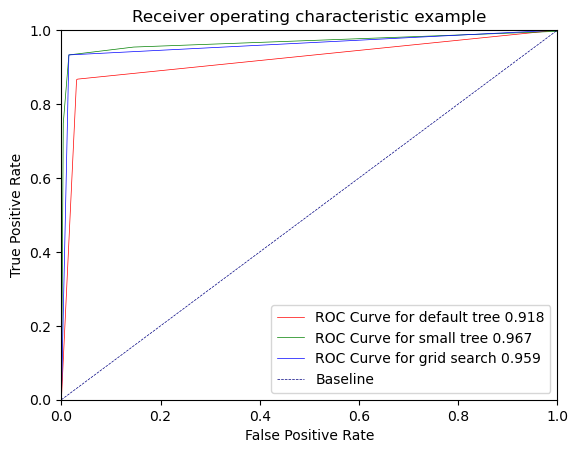

In [162]:
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for default tree {:.3f}'.format(roc_index_dt),color='red', lw=0.5)
plt.plot(fpr_dt_small, tpr_dt_small, label='ROC Curve for small tree {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for grid search {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5) 
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, label='Baseline', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


According to the values the best model is the grid search because the it has an optimal balance between precision and generalization. The second best is small tree, because it is not that depp and has less leafs it is not that complex. Lastly the default tree that has good result but the other two are better.

In [164]:
import pickle

with open('decision_tree_model.pickle', 'wb') as f:pickle.dump([model_cv, roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

Task 2. Decision Tree Modeling (4.5 marks)
1. Build a decision tree using the default setting. Examine the tree results and answer the following:
a. What parameters have been used to build the tree? Detail them.
b. What data split was used to create training and test datasets?
c. What is the classification accuracy on training and test datasets?
d. What is the size of the tree (number of nodes and rules)?
e. Which variable is used for the first split? What are the variables that are used for the second split?
f. What are the five important variables in building the tree?
g. Report if you see any evidence of model overfitting.
2. Build another decision tree tuned with GridSearchCV. Examine the tree results.
a. What are the optimal parameters for this decision tree? Explain your choice of hyperparameters to search, and the chosen search range(s)?
b. What is the classification accuracy on training and test datasets?
c. What is the size of the chosen tree (number of nodes and rules)?
d. Which variable is used for the first split? What are the variables that are used for the second split?
e. What are the five important variables in building the tree?
f. Report if you see any evidence of model overfitting.
3. What is the significant difference between these two decision tree models – default (Task 2.1) and using GridSearchCV (Task 2.2)? How do they compare performance-wise? Produce the ROC curve for both DTs. Explain why those changes may have happened.
4. From the better model, can you provide the characteristics of customers most likely to exit and stop using banking services? If it is hard to comprehend, discuss why